Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Q2. Split the dataset into a training set (70%) and a test set (30%).

Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

Accuracy: 0.8241758241758241
Precision: 0.84
Recall: 0.84
F1 Score: 0.8399999999999999
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



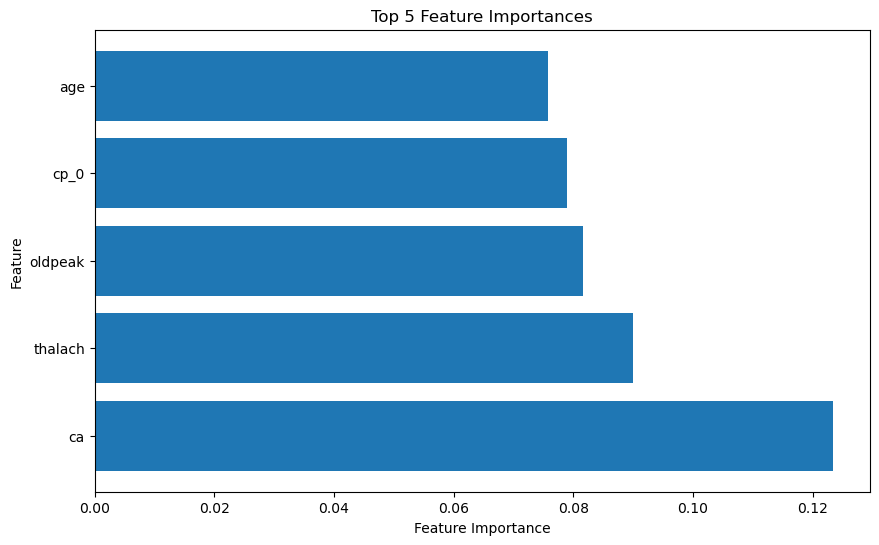

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Accuracy: 0.8351648351648352
Tuned Precision: 0.8431372549019608
Tuned Recall: 0.86
Tuned F1 Score: 0.8514851485148515
Tuned Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but RandomForestClassifier is expecting 26 features as input.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Q1: Preprocess the dataset
# Load the dataset from the provided link
url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
data = pd.read_csv(url)

# Handle missing values
data = data.dropna()

# Encode categorical variables (if applicable)
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])

# Split features and target
X = data.drop('target', axis=1)
y = data['target']

# Q2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Q3: Train a random forest classifier with default hyperparameters
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)

# Q4: Evaluate the model on the test set
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_rep)

# Q5: Get and visualize feature importances
feature_importances = random_forest.feature_importances_
feature_names = X.columns
top_feature_indices = feature_importances.argsort()[-5:][::-1]
top_feature_names = feature_names[top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances')
plt.show()

# Q6: Tune hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Q7: Report best hyperparameters and performance metrics
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print("Best Hyperparameters:", best_params)
print("Tuned Accuracy:", accuracy_tuned)
print("Tuned Precision:", precision_tuned)
print("Tuned Recall:", recall_tuned)
print("Tuned F1 Score:", f1_tuned)
print("Tuned Classification Report:\n", classification_rep_tuned)

# Q8: Plot decision boundaries (assuming 2 most important features)
feature_1 = top_feature_names[0]
feature_2 = top_feature_names[1]

x_min, x_max = X[feature_1].min() - 1, X[feature_1].max() + 1
y_min, y_max = X[feature_2].min() - 1, X[feature_2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[feature_1], X[feature_2], c=y, edgecolors='k')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()
